# Exam 

This is the practical exam for **Introduction to Python for Datascience**. Follow the below instructions to download the dataset you'll be working on. You're expected to answer all relevant questions within this notebook and email it to *bashar.dudin@epita.fr* with the following subject format *[IntroPyDS] epita_login* before exam deadline.

In [4]:
import sklearn as sk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## The dataset

We'll be working with a dataset composed of pictures of a number of public figures. Our aim is to build up a classifier for corresponding figures.  

In [5]:
from sklearn.datasets import fetch_lfw_people

In [6]:
figures = fetch_lfw_people(min_faces_per_person=60)

Target names are stored in the key *target_names*, the target or labels are the ones in the key *target* and data can be found through the *data* key. An extra *image* key is there to store the images in the proper two-dimensional format. The data key gives a vectorized version of images. 

In [7]:
figures.target

array([1, 3, 3, ..., 7, 3, 5])

In [8]:
figures.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [9]:
figures.target[:10]

array([1, 3, 3, 3, 5, 3, 6, 3, 7, 0])

In [10]:
figures.data.shape

(1348, 2914)

In [11]:
figures.images.shape

(1348, 62, 47)

In [12]:
62*47

2914

We have $1348$ images of $62\times 47$ pixels. The following code enables you to have a look at part of these images.

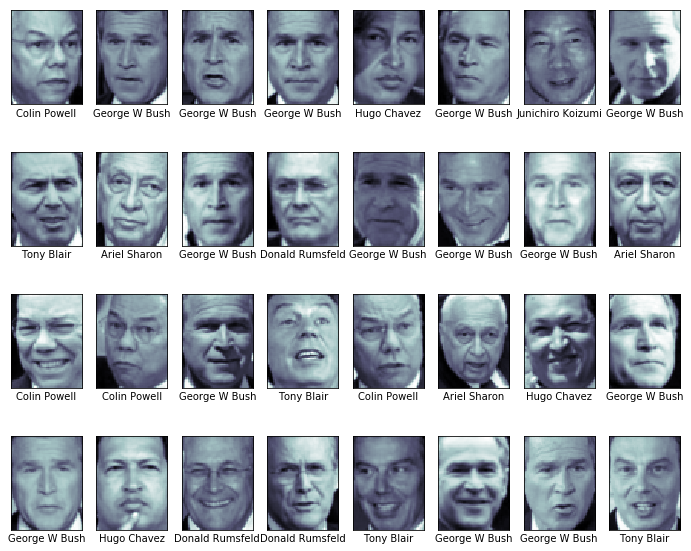

In [13]:
%matplotlib inline
fig, ax = plt.subplots(4, 8, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(figures.images[i], cmap="bone")
    axi.set(xticks=[], yticks=[], xlabel=figures.target_names[figures.target[i]]) 

### 1. Write down a function that plots a single image from the previous dataset.

In [14]:
def show_image(index):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(figures.images[index], cmap="bone")
    ax.set(xticks=[], yticks=[], xlabel=figures.target_names[figures.target[index]])

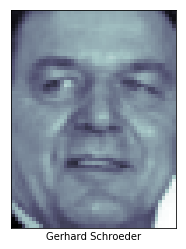

In [15]:
show_image(200)

In [16]:
X, y = figures.data, figures.target

# Modeling

### 2. Split your dataset into a test set and a training set. What do we need that for?

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
y_train_bis[200] == y[200]

True

In order to be able to evaluate model accuracy over all different targets.

### 3. Checking rows at equal position of `X` and `X_train` the same? How does `train_test_split` work?

In [21]:
y[200] == y_train[200]

False

## First (Too) Naive Models

### 4. What is the expected score for the constant model always returning a given same target?

For the constant model, and depending on the chosen target we get the following proportion for expected accuracy scores. 

In [22]:
dico = {}
for i in range(figures.target_names.shape[0]):
    dico[figures.target_names[i]] = np.sum(figures.target == i)/figures.target.shape[0]
dico

{'Ariel Sharon': 0.05712166172106825,
 'Colin Powell': 0.17507418397626112,
 'Donald Rumsfeld': 0.0897626112759644,
 'George W Bush': 0.39317507418397624,
 'Gerhard Schroeder': 0.08086053412462908,
 'Hugo Chavez': 0.052670623145400594,
 'Junichiro Koizumi': 0.04451038575667656,
 'Tony Blair': 0.10682492581602374}

In [30]:
from sklearn.base import BaseEstimator

In [31]:
np.array([1]*10).shape

(10,)

In [32]:
class cst_model(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X, target=1):
        return np.array([target]*X.shape[0])

In [33]:
cst_M = cst_model()

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, cst_M.predict(X_test))

0.18888888888888888

### 5. Code down a random model following a discrete uniform law over the integer interval {0, ... , 7}. 

In [26]:
from numpy.random import randint 

In [36]:
randint(0, 7, 10)

array([2, 4, 1, 5, 4, 6, 1, 1, 3, 6])

In [37]:
class random_model(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X, target=1):
        return randint(0,7, size=X.shape[0])

### 6. Compute its accuracy score on the dataset.

In [38]:
rand_M = random_model()

In [39]:
accuracy_score(y_test, rand_M.predict(X_test))

0.10740740740740741

There is no fit with this model. It does not see any part of the dataset. It is sensful to compute the accuracy score over the whole dataset `X`.

### 7. In the specific case of previous (too) naive approaches discuss which one does better?

The expected value (mean value) for accuracy score of random model is $\frac{1}{7}$. There are two cases when the accuracy score in the constant model is higher all the others have a worse accuracy score. Remember though : **None of them is a good model, there is no correlation between input and output**.

# Naive Bayes Classifier

### 8. Train and evaluate a naive Bayes classifier.

### 9. Compare this classifier to random one. 

### 10. For which figures does the model have highest accuracy scores? 

*You might want to use the **confusion matrix**, though not needed.*

### 11. What is the model's error proportion in predicting highest scoring figures?

### 12. What is the confusion matrix about? Plot a heat map of the confusion matrix.

### 13. How can you get classification errors clearer?

## Training an SVM Classifier

The question now is to use a more sophisticated model. Called *Support Vector Machines*.

### 14. Look into the `sklearn` documentation for correponding class train and evaluate such a model.

*You'll be using the SVC with second proposed hyperparameter in the documentation for **kernel**.*

### 15. Plot again the confusion matrix of model. Are there any changes in the best fits?

### 16. What are the resutls you get if you change kernel to `rbf`?

### 17. Time the time it takes to train previous SVM with best hyperparameter results.

# Reducing dimension

## 18. This prior to last question is voluntarily open : 

You are expected to transform your data using an unsupervised model reducing dimesionality to the first $150$ features. For this you are going to

    - Read proper documentation about pipelines in sklearn ; *make_pipeline*.
    - Create a pipeline that reduces dimesion using `PCA` limiting output to first $150$ components.
    - Train and evaluate that model.
    - Compare time gain and accuracy loss to previous model.

### 19. Explain with your own words output of  `sklearn` `classification report`.